<a href="https://colab.research.google.com/github/nathansouz4/poo/blob/main/natural_language_processing_etapa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Importando as bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importando o dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [233]:
dataset = pd.read_parquet('/content/drive/MyDrive/Processo_seletivo_Etapa_2/sample.parquet', engine='auto')

In [ ]:
#dataset = pd.read_parquet('sample.parquet', engine='auto')

## Visualizando o dataset

In [234]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
dataset.head()

,num_processo,data_ajuizamento,data_primeira_movimentacao_processual,data_ultima_movimentacao,autor,reu,tutela_antecipada,vara,titular_substituto,classe_atual,codigo_assunto_cnj,assunto_cnj,complemento_assunto_cnj,detalhe_assunto_cnj,num_advogados,advogado_1,juizado_itinerante,medida_acautelatoria,justica_gratuita,ministerio_publico,prioridade_processual,rpv,tipo_distribuicao,pedido_urgencia,n_audiencias_conciliacao,n_audiencias_instrucao,n_pericias_realizadas,nome_perito,processo_arquivado,data_arquivamento,n_movimentacoes,tempo_processual,liminar,data_liminar,data_sentenca,magistrado_sentenca,resultado_1_grau,conteudo_sentenca,n_dias_ate_sentenca,n_tokens_sentenca,relator_acordao,data_sessao_tr,data_acordao,conteudo_acordao,resultado_2_grau,n_tokens_acordao
0,0500454-62.2017.4.05.8402,2017-03-06,2017-03-06 11:01:00,2017-10-30 10:07:00,Lourival Francisco da Silva (027.173.384-54)\nMaria das Vitórias Nunes Silva Lourenço (RN008392),Fazenda Nacional (00.394.460/0239-40)\nMunicípio de Lagoa Nova (08.182.313/0001-10)\nUNIÃO (26.9...,N,9-RN,Titular,Execução de Título Judicial,6048,Direito Tributário,Contribuições,Contribuições Previdenciárias,1,RN008392,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,N,0,0,0,SEM PERÍCIA,1,2017-10-26 08:47:00,56,238.0,SEM PEDIDO LIMINAR,NaT,2017-05-21 18:23:56,ARNALDO PEREIRA DE ANDRADE SEGUNDO,PROCEDENTE,SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA...,76.307593,1309,Almiro José da Rocha Lemos,2017-08-09 09:00:00,2017-08-14 10:46:34,PROCESSO 0500454-62.2017.4.05.8402 EMENTA:DIREITO TRIBUTÁRIO. SERVIDOR PÚBLICO. RECURSO INOMINA...,NÃO PROVIMENTO,381.0
1,0517700-16.2013.4.05.8013,2013-10-09,2013-10-09 20:54:00,NaT,MARIA LUCIA CARDOSO (382.242.084-00)\nEmanuel Florêncio Barbosa (AL002019),Caixa Econômica Federal (00.360.305/0001-04),N,9-AL,Titular,Procedimento do Juizado Especial Cível,10433,Direito Civil,Responsabilidade Civil,Indenização por Dano Moral,1,AL002019,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,S,0,0,0,SEM PERÍCIA,<NA>,NaT,<NA>,NaN,SEM PEDIDO LIMINAR,NaT,2013-10-30 17:10:04,ANDRÉ CARVALHO MONTEIRO,EXTINTO SEM MÉRITO,"SENTENÇA Trata-se de ação especial cível, em cuja petição verifico, de plano, a existência de ví...",20.844491,263,NaN,NaT,NaT,None,NaN,0.1
2,0502388-07.2007.4.05.8305,2007-07-13,2007-07-13 13:51:00,NaT,QUITÉRIA BARBOSA DA SILVA NASCIMENTO (062.819.274-60)\nPaulo Emanuel Perazzo Dias (PE020418),Instituto Nacional do Seguro Social - INSS (29.979.036/0193-21),N,23-PE,Titular,Procedimento do Juizado Especial Cível,6138,Direito Previdenciário,"RMI - Renda Mensal Inicial, Reajustes e Revisões Específicas",Reajustes e Revisões Específicos,1,PE020418,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,N,0,0,0,SEM PERÍCIA,<NA>,NaT,<NA>,NaN,SEM PEDIDO LIMINAR,NaT,2007-12-04 09:35:02,ANDRÉ CARVALHO MONTEIRO,EXTINTO SEM MÉRITO,SENTENÇA Vistos etc. Trata-se de ação especial visando a cobrança de diferenças na concessão de ...,143.822245,956,NaN,NaT,NaT,None,NaN,0.1
3,0503551-02.2014.4.05.8103,2014-04-02,2014-04-02 11:02:00,NaT,Emanuela Carneiro Tabosa (777.839.723-49)\nBruno Henrique Vaz Carvalho (CE019341)\nDiego de Frei...,UNIÃO (FAZENDA NACIONAL) - Procuradoria da Fazenda Nacional no Ceará - PFN/CE (00.394.460/0223-82),N,19-CE,Titular,Procedimento do Juizado Especial Cível,6048,Direito Tributário,Contribuições,Contribuições Previdenciárias,2,CE019341,N,N,S,N,N,Não houve expedição de RPV/PRC,Automática,S,0,0,0,SEM PERÍCIA,<NA>,NaT,<NA>,NaN,INDEFERIDA,2014-11-16 23:11:00,2014-04-23 19:41:13,ADONIAS RIBEIRO DE CARVALHO NETO,PROCEDENTE,"SENTENÇA I - RELATÓRIO Cuida-se de ação em que a parte autora, Emanuela Carneiro Tabosa postula ...",21.360567,3037,CÍNTIA MENEZES BRUNETTA,2014-06-25 13:30:00,2014-06-27 16:14:43,"VOTO Relatório dispensado, nos termos do art. 38 da Lei n.o 9.099/95. Competência dos Juizados E...",NÃO PROVIMENTO,1214.0
4,0503488-94.2016.4.05.8300,2016-03-21,2016-03-21 11:04:00,2019-02-19 13:16:00,Lúcio Flav

In [ ]:
# resetando configuracao de display de dados
pd.reset_option('^display.', silent=True)

## Analise exploratoria de dados continuos e discretos

In [ ]:
# Verificar tipos de dados
dataset.dtypes

num_processo                                     object
data_ajuizamento                         datetime64[ns]
data_primeira_movimentacao_processual    datetime64[ns]
data_ultima_movimentacao                 datetime64[ns]
autor                                            object
reu                                              object
tutela_antecipada                              category
vara                                           category
titular_substituto                             category
classe_atual                                   category
codigo_assunto_cnj                                int64
assunto_cnj                                    category
complemento_assunto_cnj                        category
detalhe_assunto_cnj                            category
num_advogados                                      Int8
advogado_1                                     category
juizado_itinerante                             category
medida_acautelatoria                           c

In [ ]:
#selecao das colunas com dados numericos relevantes
df_numerico = dataset.loc[:,['num_advogados','n_audiencias_conciliacao', 'n_audiencias_instrucao', 'n_pericias_realizadas' , 'processo_arquivado', 'n_movimentacoes', 'tempo_processual', 'n_dias_ate_sentenca']]

In [ ]:
df_numerico.head()

,num_advogados,n_audiencias_conciliacao,n_audiencias_instrucao,n_pericias_realizadas,processo_arquivado,n_movimentacoes,tempo_processual,n_dias_ate_sentenca
0,1,0,0,0,1,56,238.0,76.307593
1,1,0,0,0,<NA>,<NA>,NaN,20.844491
2,1,0,0,0,<NA>,<NA>,NaN,143.822245
3,2,0,0,0,<NA>,<NA>,NaN,21.360567
4,1,0,0,0,1,114,1065.0,784.066493


In [ ]:
# verificando quantidade de celulas nulas
df_numerico.isna().sum()

num_advogados                  0
n_audiencias_conciliacao       0
n_audiencias_instrucao         0
n_pericias_realizadas          0
processo_arquivado          1638
n_movimentacoes             1638
tempo_processual            1638
n_dias_ate_sentenca            0
dtype: int64

In [ ]:
# visualizar só as instâncias que tem valores ausentes
df_numerico[df_numerico.isnull().sum(axis = 1) != 0]

In [ ]:
# vamos substituir o valor ausente das categorias com a média deste atributo em relação às demais do conjunto de dados.
df_numerico['tempo_processual'] = df_numerico['tempo_processual'].where(pd.notna(df_numerico['tempo_processual']), df_numerico['tempo_processual'].mean())

In [ ]:
df_numerico.describe()

,num_advogados,n_audiencias_conciliacao,n_audiencias_instrucao,n_pericias_realizadas,processo_arquivado,n_movimentacoes,tempo_processual,n_dias_ate_sentenca
count,5000.000000,5000.000000,5000.000000,5000.000000,3362.000000,3362.000000,3362.000000,5000.000000
mean,1.159200,0.082000,0.150000,0.409800,0.920880,44.306068,247.064456,123.781600
std,0.579588,0.280164,0.369225,0.550568,0.269965,25.691253,268.830437,130.592511
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.065308,0.017812
25%,1.000000,0.000000,0.000000,0.000000,1.000000,28.000000,97.515625,47.270289
50%,1.000000,0.000000,0.000000,0.000000,1.000000,39.000000,169.750000,91.070312
75%,1.000000,0.000000,0.000000,1.000000,1.000000,54.000000,293.000000,159.234786
max,8.000000,2.000000,3.000000,3.000000,1.000000,492.000000,3214.000000,1840.410521


### Analise grafica dos dados continuos e discretos relevantes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d8ba48310>,
      dtype=object)

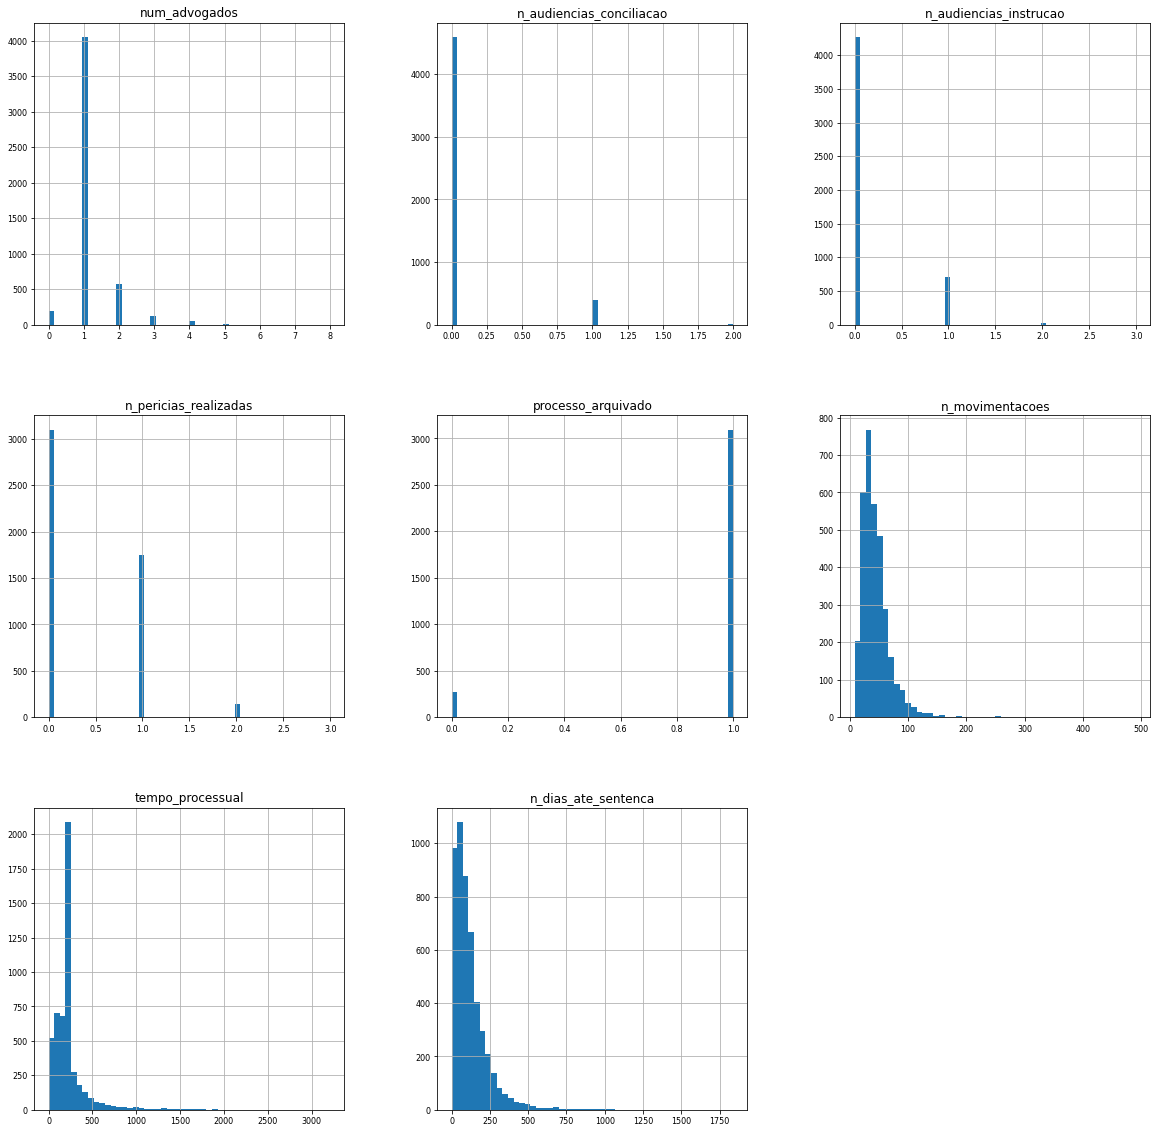

In [ ]:
# podemos utilizar formas mais visuais para ter uma noção do padrão de comportamento dos nossos dados.
df_numerico.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

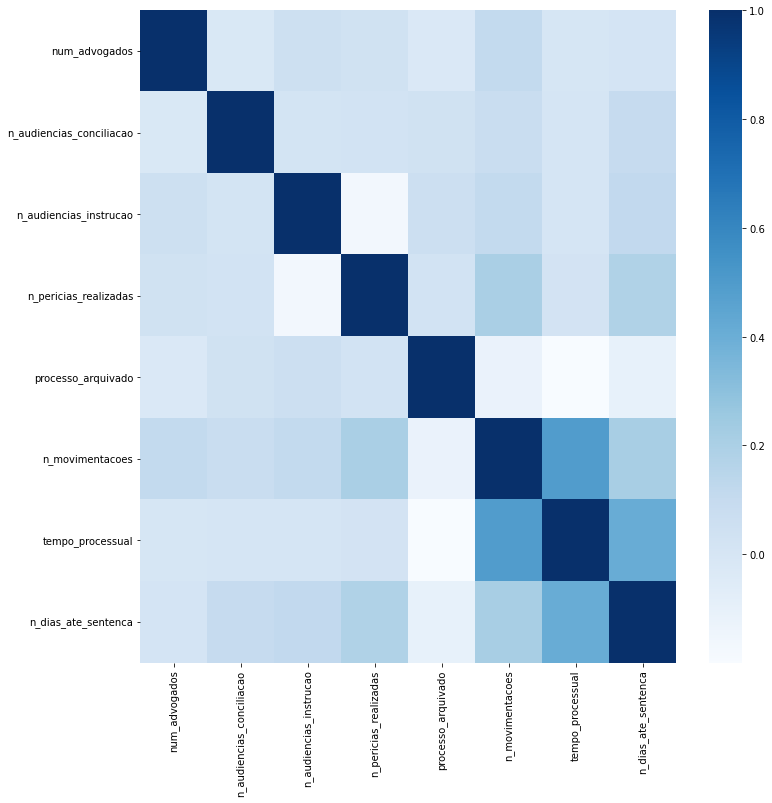

In [ ]:
# visualizar correlação entre as variáveis
plt.figure(figsize=(12, 12))
sns.heatmap(df_numerico.corr(), cmap='Blues');

o mapa de calor, conhecido como heartmap() é construido com base no coeficiente de pearson, que define o grau de correlação entre duas variáveis na estatística. Para efeitos práticos, agora só é necessário entender que quanto mais perto o coeficiente estiver de 1, mais positivamente correlacionadas as variáveis estarão. E quanto mais perto de -1, mais negativamente.

Podemos visualizar que temos uma possível correlacao entre as variaveis de tempo processual com o numero de movimentacoes do processo e numero de dias até sentença.

## Analise exploratoria de dados categoricos e descritivos

In [ ]:
# Verificar tipos de dados
dataset.dtypes

In [ ]:
#selecao das variaveis categoricas/descritivas relevantes para analise
df_categorico = dataset.loc[:,['autor','reu','tutela_antecipada', 'vara', 'titular_substituto','classe_atual','assunto_cnj','complemento_assunto_cnj','detalhe_assunto_cnj','advogado_1','juizado_itinerante','medida_acautelatoria', 'justica_gratuita', 'ministerio_publico', 'prioridade_processual', 'rpv', 'tipo_distribuicao', 'pedido_urgencia','nome_perito', 'liminar','magistrado_sentenca','resultado_1_grau','conteudo_sentenca','relator_acordao', 'resultado_2_grau', 'conteudo_acordao']]

In [ ]:
df_categorico.head()

,autor,reu,tutela_antecipada,vara,titular_substituto,classe_atual,assunto_cnj,complemento_assunto_cnj,detalhe_assunto_cnj,advogado_1,...,tipo_distribuicao,pedido_urgencia,nome_perito,liminar,magistrado_sentenca,resultado_1_grau,conteudo_sentenca,relator_acordao,resultado_2_grau,conteudo_acordao
0,Lourival Francisco da Silva (027.173.384-54)\n...,Fazenda Nacional (00.394.460/0239-40)\nMunicíp...,N,9-RN,Titular,Execução de Título Judicial,Direito Tributário,Contribuições,Contribuições Previdenciárias,RN008392,...,Automática,N,SEM PERÍCIA,SEM PEDIDO LIMINAR,ARNALDO PEREIRA DE ANDRADE SEGUNDO,PROCEDENTE,SENTENÇA 1. Relatório Cuida-se de ação propost...,Almiro José da Rocha Lemos,NÃO PROVIMENTO,PROCESSO 0500454-62.2017.4.05.8402 EMENTA:DIR...
1,MARIA LUCIA CARDOSO (382.242.084-00)\nEmanuel ...,Caixa Econômica Federal (00.360.305/0001-04),N,9-AL,Titular,Procedimento do Juizado Especial Cível,Direito Civil,Responsabilidade Civil,Indenização por Dano Moral,AL002019,...,Automática,S,SEM PERÍCIA,SEM PEDIDO LIMINAR,ANDRÉ CARVALHO MONTEIRO,EXTINTO SEM MÉRITO,"SENTENÇA Trata-se de ação especial cível, em c...",NaN,NaN,None
2,QUITÉRIA BARBOSA DA SILVA NASCIMENTO (062.819....,Instituto Nacional do Seguro Social - INSS (29...,N,23-PE,Titular,Procedimento do Juizado Especial Cível,Direito Previdenciário,"RMI - Renda Mensal Inicial, Reajustes e Revisõ...",Reajustes e Revisões Específicos,PE020418,...,Automática,N,SEM PERÍCIA,SEM PEDIDO LIMINAR,ANDRÉ CARVALHO MONTEIRO,EXTINTO SEM MÉRITO,SENTENÇA Vistos etc. Trata-se de ação especial...,NaN,NaN,None
3,Emanuela Carneiro Tabosa (777.839.723-49)\nBru...,UNIÃO (FAZENDA NACIONAL) - Procuradoria da Faz...,N,19-CE,Titular,Procedimento do Juizado Especial Cível,Direito Tributário,Contribuições,Contribuições Previdenciárias,CE019341,...,Automática,S,SEM PERÍCIA,INDEFERIDA,ADONIAS RIBEIRO DE CARVALHO NETO,PROCEDENTE,SENTENÇA I - RELATÓRIO Cuida-se de ação em que...,CÍNTIA MENEZES BRUNETTA,NÃO PROVIMENTO,"VOTO Relatório dispensado, nos termos do art. ..."
4,Lúcio Flavio de Lima Albuquerque (095.403.004-...,ANGELA MARIA DO NASCIMENTO SILVA (157.771.544-...,N,19-PE,Substituto,Procedimento do Juizado Especial Cível,Direito Previdenciário,Pedidos Genéricos Relativos aos Benefícios em ...,Conversão,PE020070D,...,Automática,N,SEM PERÍCIA,SEM PEDIDO LIMINAR,GUILHERME SOARES DINIZ,IMPROCEDENTE,SENTENÇA Tipo A I – RELATÓRIO Dispensado o rel...,Joaquim Lustosa Filho,NÃO PROVIMENTO,EMENTA PREVIDENCIÁRIO. PENSÃO POR MORTE. PROVA...


### Visualizando Variáveis Qualitativas

In [ ]:
# contagem de ocorrencias de resposta binaria
tutela_antecipada = df_categorico['tutela_antecipada'].value_counts().reset_index() 
juizado_itinerante = df_categorico['juizado_itinerante'].value_counts().reset_index() 
medida_acautelatoria = df_categorico['medida_acautelatoria'].value_counts().reset_index() 
justica_gratuita = df_categorico['justica_gratuita'].value_counts().reset_index() 
ministerio_publico = df_categorico['ministerio_publico'].value_counts().reset_index() 
prioridade_processual = df_categorico['prioridade_processual'].value_counts().reset_index() 
pedido_urgencia = df_categorico['pedido_urgencia'].value_counts().reset_index() 

In [ ]:
#criando o dataframe de variaveis qualitativas ordinarias
from functools import reduce
data_frames = [tutela_antecipada,juizado_itinerante,medida_acautelatoria,justica_gratuita,ministerio_publico,prioridade_processual,pedido_urgencia]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames)
df_merged = df_merged.T
df_merged.reset_index(inplace=True) 
df_merged.columns = ['categorias', 'Não' , 'Sim']
df_merged = df_merged.drop(labels=0, axis=0)
df_merged.head()

,categorias,Não,Sim
1,tutela_antecipada,4007,993
2,juizado_itinerante,4969,31
3,medida_acautelatoria,4983,17
4,justica_gratuita,362,4638
5,ministerio_publico,4889,111


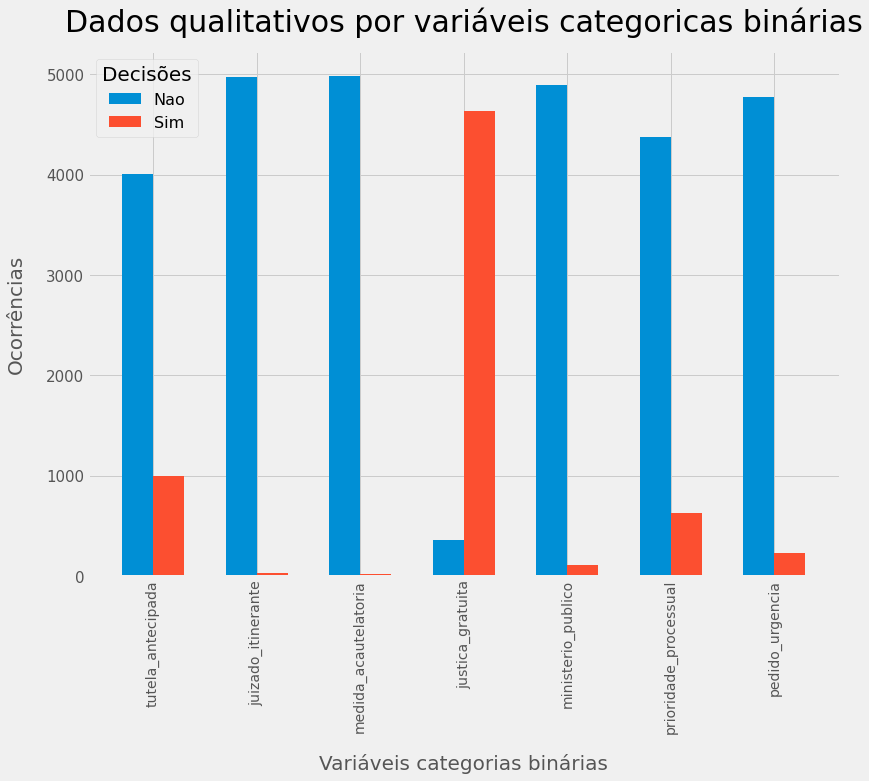

In [ ]:
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")
#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (12,9))
#extract the labels
label = df_merged['categorias']
#use this to create x ticks to add the data to
x = np.arange(len(label))
#set a width for each bar 
width = 0.3
#create out first bar
rect1 = ax.bar(x - width/2,
              df_merged['Não'],
              width = width, 
              label = 'Nao')
#create the second bar
#with a centre half a width to the right

rect2 = ax.bar(x + width/2,
              df_merged['Sim'],
              width = width,
              label = 'Sim')
#add the labels to the axis
ax.set_ylabel("Ocorrências",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Variáveis categorias binárias",
             fontsize = 20,
             labelpad =20)
ax.set_title("Dados qualitativos por variáveis categoricas binárias",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "Decisões",
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

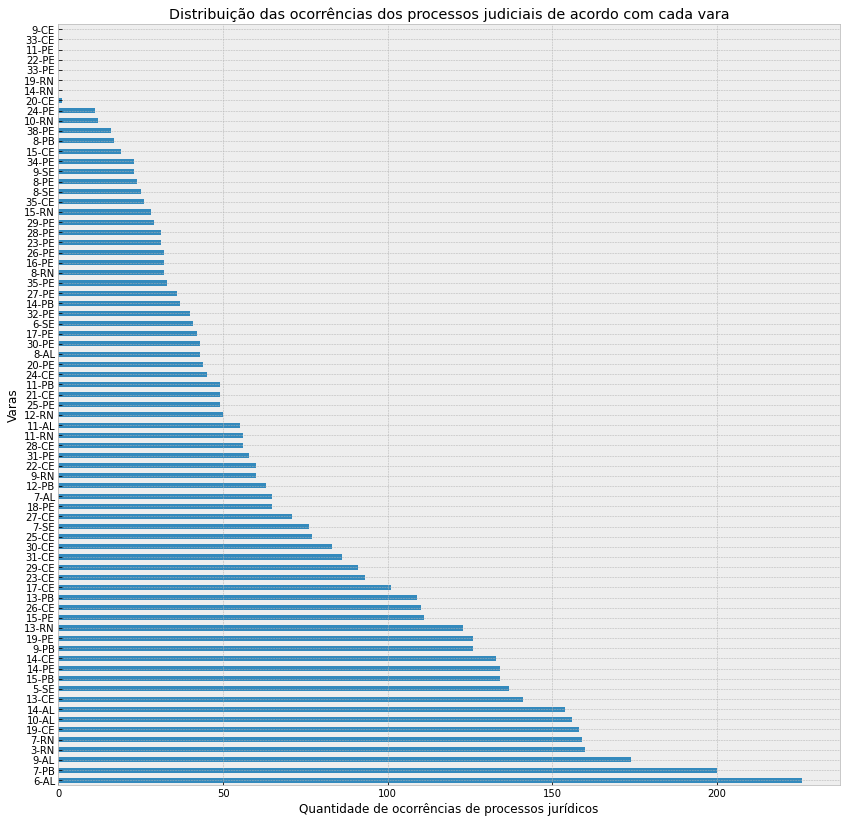

In [ ]:
vara = df_categorico['vara'].value_counts()
plt.style.use('bmh')
plt.figure(figsize = (14, 14))
vara.plot(kind='barh')
plt.xlabel("Quantidade de ocorrências de processos jurídicos")
plt.ylabel("Varas")
plt.title("Distribuição das ocorrências de processos judiciais de acordo com cada vara")
plt.show()

In [ ]:
resultado_1_grau = df_categorico['resultado_1_grau'].value_counts()
resultado_2_grau = df_categorico['resultado_2_grau'].value_counts()

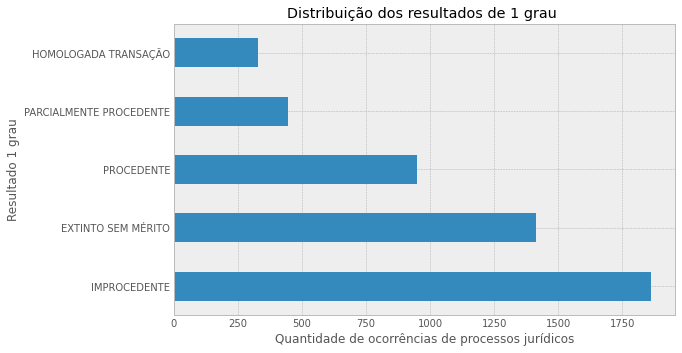

In [ ]:
plt.style.use('bmh')
plt.figure(figsize = (8, 5))
resultado_1_grau.plot(kind='barh')
plt.xlabel("Quantidade de ocorrências de processos jurídicos")
plt.ylabel("Resultado 1 grau")
plt.title("Distribuição dos resultados de 1 grau ")
plt.show()

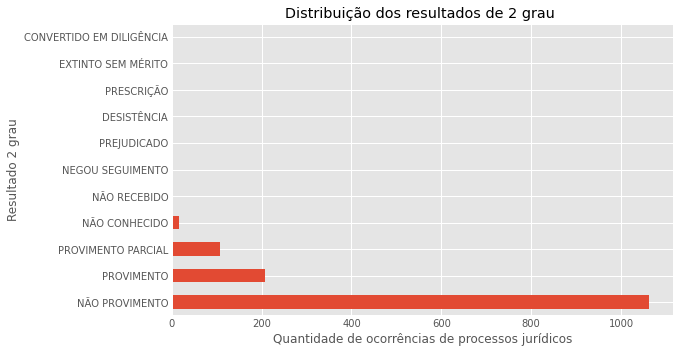

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (8, 5))
resultado_2_grau.plot(kind='barh')
plt.xlabel("Quantidade de ocorrências de processos jurídicos")
plt.ylabel("Resultado 2 grau")
plt.title("Distribuição dos resultados de 2 grau ")
plt.show()

## Correlacionando dados de texto relevantes para modelo ML


> tratamento dos dados de texto



In [ ]:
df_assunto = dataset.loc[:,['assunto_cnj','complemento_assunto_cnj','detalhe_assunto_cnj']]

In [ ]:
df_assunto.head()

In [ ]:
df_sentenca = dataset.loc[:,['resultado_1_grau','conteudo_sentenca','resultado_2_grau','conteudo_acordao']]

In [ ]:
df_sentenca.head()

,resultado_1_grau,conteudo_sentenca,resultado_2_grau,conteudo_acordao
0,PROCEDENTE,"SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA, na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incid...",NÃO PROVIMENTO,PROCESSO 0500454-62.2017.4.05.8402 EMENTA:DIREITO TRIBUTÁRIO. SERVIDOR PÚBLICO. RECURSO INOMINADO. CONTRIBUIÇÃOPREVIDENCIÁRIA. TERÇO DE FÉRIAS. REPETIÇÃO DE INDÉBITO. NÃO INCIDÊNCIA.PRECEDENTES D...
1,EXTINTO SEM MÉRITO,"SENTENÇA Trata-se de ação especial cível, em cuja petição verifico, de plano, a existência de vício processual que impede o regular desenvolvimento do processo, nos seguintes termos: - No presente...",NaN,None
2,EXTINTO SEM MÉRITO,"SENTENÇA Vistos etc. Trata-se de ação especial visando a cobrança de diferenças na concessão de salário-maternidade, contra o qual se insurge o INSS através de contestação. Fundamento e decido. A ...",NaN,None
3,PROCEDENTE,"SENTENÇA I - RELATÓRIO Cuida-se de ação em que a parte autora, Emanuela Carneiro Tabosa postula o reconhecimento da inexistência de fato gerador da Contribuição Previdenciária e do Imposto de Rend...",NÃO PROVIMENTO,"VOTO Relatório dispensado, nos termos do art. 38 da Lei n.o 9.099/95. Competência dos Juizados Especiais Federais. No caso em apreço, observa-se que o montante das parcelas vencidas até a data do ..."
4,IMPROCEDENTE,"SENTENÇA Tipo A I – RELATÓRIO Dispensado o relatório, na forma do artigo 38 da Lei 9.099/95, subsidiariamente aplicado, nos termos do artigo 1o da Lei 10.259/2001. II – FUNDAMENTAÇÃO Litisconsórci...",NÃO PROVIMENTO,EMENTA PREVIDENCIÁRIO. PENSÃO POR MORTE. PROVA EMPRESTADA. POSSIBILIDADE. REQUISITOS PARA A CONCESSÃO DO BENEFÍCIO NÃO PREENCHIDOS. UTILIZAÇÃO DA TÉCNICA PER RELATIONEM. RECURSO IMPROVIDO. Trata-s...


## ML Model

## Cleaning the texts

stopwords são palavras como geralmente irrelevantes para o resultado que buscamos.

In [243]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 5000):
  conteudo_sentenca = re.sub('[^a-zA-Z]', ' ', dataset['conteudo_sentenca'][i])
  conteudo_sentenca = conteudo_sentenca.lower()
  conteudo_sentenca = conteudo_sentenca.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('portuguese')
  conteudo_sentenca = [ps.stem(word) for word in conteudo_sentenca if not word in set(all_stopwords)]
  conteudo_sentenca = ' '.join(conteudo_sentenca)
  corpus.append(conteudo_sentenca)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [254]:
print(type(corpus))
print(len(corpus))

<class 'list'>
5000


In [255]:
print(corpus[0])

senten relat rio cuida proposta face fazenda nacion munic pio lagoa nova part autora objetiva devolu valor retido font t tulo pss incident sobr parcela ter constitucion f ria sucinto relat rio at dispensado termo par grafo nico art lei aplic vel subsidiariament juizado especiai federai conson ncia art lei fundamenta benef cio gratuidad judici ria tendo vista autora possui rendimento inferior teto rgp conform ficha financeira acostada auto crit rio reputo razo vel fin concess beness legal defiro pleito justi gratuita au ncia documento indispen vei propositura quanto alega au ncia documento indispen vei propositura consistent necessidad comprova valor tributo retido igualment n merec acolhida efeito rela demanda dessa natureza demai conhecida posi administra p blica contr ria tese sustentada apelada modo patent resist ncia preten deduzida ju zo portanto inequ voco interess agir raz julgado invocado r contesta n ajusta caso sub examin preliminar m rito prescri rela prescri direito pleitea

## Creating the Bag of Words model

In [260]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = dataset.loc[:, 'resultado_1_grau'].values
print(len(x))

5000


## Splitting the dataset into the Training set and Test set

In [263]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [265]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(y_pred)

## Making the Confusion Matrix

In [271]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[227   2  26  11  24]
 [  1  52   8   1   3]
 [  0   0 238  39  88]
 [  0   0  20  31  44]
 [  0   0  37  32 116]]


0.664

## Predicting

In [273]:
print(dataset['conteudo_sentenca'][0])

SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA, na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incidente sobre parcelas de terço constitucional de férias. É o sucinto relatório, que seria até dispensado, nos termos do parágrafo único do art. 38 da Lei no 9.099/1995, aplicável subsidiariamente aos Juizados Especiais Federais, em consonância com o art. 1o da Lei no 10.259/2001. 2. Fundamentação Do benefício da gratuidade judiciária Tendo em vista que a autora possui rendimento inferior ao teto do RGPS, conforme fichas financeiras acostadas aos autos, critério este que se reputo razoável para fins de concessão da benesse legal, defiro o pleito de justiça gratuita. Da ausência de documentos indispensáveis à propositura da ação Quanto à alegação de ausência de documentos indispensáveis à propositura da ação, consistente na necessidade de comprovação dos valores de tributos retidos, igualmente não

In [276]:
print(dataset['resultado_1_grau'][0])

PROCEDENTE


In [275]:
new_review = 'SENTENÇA 1. Relatório Cuida-se de ação proposta em face da FAZENDA NACIONAL e MUNICÍPIO DE LAGOA NOVA, na qual a parte autora objetiva a devolução de valores retidos na fonte a título de PSS incidente sobre parcelas de terço constitucional de férias. É o sucinto relatório, que seria até dispensado, nos termos do parágrafo único do art. 38 da Lei no 9.099/1995, aplicável subsidiariamente aos Juizados Especiais Federais, em consonância com o art. 1o da Lei no 10.259/2001. 2. Fundamentação Do benefício da gratuidade judiciária Tendo em vista que a autora possui rendimento inferior ao teto do RGPS, conforme fichas financeiras acostadas aos autos, critério este que se reputo razoável para fins de concessão da benesse legal, defiro o pleito de justiça gratuita. Da ausência de documentos indispensáveis à propositura da ação Quanto à alegação de ausência de documentos indispensáveis à propositura da ação, consistente na necessidade de comprovação dos valores de tributos retidos, igualmente não merece acolhida. Com efeito, em relação a demandas dessa natureza, é por demais conhecida a posição do administração pública, contrária à tese sustentada pela apelada, de modo que é patente a resistência à pretensão deduzida em Juízo e, portanto, inequívoco o interesse de agir, razão pela qual o julgado invocado pela réna contestação não se ajusta ao caso sub examine. Da preliminar de mérito - prescrição Com relação à prescrição, o direito de pleitear a restituição extingue-se com o decurso do prazo de 5 (cinco) anos contados a partir dos marcos estipulados no art. 168 do Código Tributário Nacional: “Art. 168 - O direito de pleitear a restituição extingue-se com o decurso do prazo de 5 (cinco) anos, contados: I - nas hipóteses dos incisos I e II do artigo 165, da data da extinção do crédito tributário; II - na hipótese do inciso III do artigo 165, da data em que se tornar definitiva a decisão administrativa ou passar em julgado a decisão judicial que tenha reformado, anulado, revogado ou rescindido a decisão condenatória.” Nesse pórtico, deve-se analisar a incidência da prescrição quinquenal, que pode ser reconhecida de ofício pelo juiz, conforme o art. 219, §5o do Código de Processo Civil, com redação dada pela lei 11.280/2006. Tratando-se de servidor público regido por regime jurídico próprio, onde o lançamento é feito pela própria União, tem-se um lançamento de ofício, não havendo o que falar em prazo de homologação para que se torne definitivo. Desde o momento em que houve o desconto, ocorreu a extinção do crédito tributário, nascendo o direito do contribuinte de pleitear a restituição. Dessa forma, estão prescritos eventuais créditos recolhidos há mais de cinco anos da propositura da presente ação. Corroborando tais assertivas, tem-se o seguinte acórdão: PROCESSUAL CIVIL. TRIBUTÁRIO. AGRAVO REGIMENTAL. EMBARGOS DE DECLARAÇÃO. RECURSO ESPECIAL. REPETIÇÃO DE INDÉBITO. CONTRIBUIÇÃO DE SERVIDOR INATIVO. EMBARGOS ACOLHIDOS. INTEGRAÇÃO NOS LIMITES DA IMPUGNAÇÃO. TRIBUTO SUJEITO A LANÇAMENTO DE OFÍCIO. PRESCRIÇÃO. PRAZO QUINQUENAL. ART. 168, I, DO CTN. PRECEDENTES DA PRIMEIRA TURMA DESTE TRIBUNAL. 1. Ação objetivando afastar desconto incidente sobre contribuição previdenciária destinada ao Instituto de Previdência do Estado de São Paulo - Ipesp recolhida sobre os proventos de servidores aposentados. 2. Nos embargos declaratórios opostos pelos autores (fls. 409/412), que complementaram a decisão que analisou o recurso especial, não se apreciou questão fora dos limites do apelo nobre, pois se limitou a integração ao exame do prazo prescricional a ser observado na restituição da contribuição em debate, tema este solucionado pelo Tribunal de Justiça do Estado de São Paulo. 3. Quando do julgamento do AgRg no REsp 1.096.074/SP, da relatoria do eminente Ministro Francisco Falcão, DJ de 26/2/2009, a Primeira Turma do STJ decidiu, em síntese, que: a) a hipótese de descontos de contribuição de seguridade incidente sobre a remuneração de servidor configura-se lançamento de ofício e não por homologação; b) nesse panorama, o prazo prescricional a ser observado, no caso, é o quinquenal, conforme disciplina o art. 168, I, do CTN. 4. De igual modo: REsp 949.788/SC, Relator Ministro Franciso Falcão, DJ de 20.10.2008. 5. Agravo regimental não provido. (STJ. ADRESP 200702231531. Relator Ministro Benedito Gonçalves. Primeira Turma. DJU em 18/02/2010). (sem grifos no original). Do mérito propriamente dito A controvérsia do caso está em saber se é devida a incidência de contribuição previdenciária sobre o adicional de 1/3 de férias constitucional e se a parte autora faz jus à devolução do valor pago a esse título. Como se sabe, o modelo constitucional previdenciário dos servidores públicos federais está delineado em bases contributivas e atuariais, na conformidade da EC 20/98. Considerando que os valores pagos a título de adicional de um terço de férias não serão recebidos pelo servidor quando de sua aposentadoria, não podem integrar a base de cálculo da contribuição previdenciária. Assim, reconheço a não-incidência da contribuição previdenciária sobre o adicional de 1/3 de férias e adoto, integralmente, como razões de decidir, o contido no excerto do STJ, que está alinhado à jurisprudência do STF, abaixo transcrito: PROCESSUAL CIVIL. TRIBUTÁRIO. AGRAVO INTERNO NO RECURSO ESPECIAL. CÓDIGODEPROCESSOCIVILDE2015.APLICABILIDADE.ARGUMENTOS INSUFICIENTESPARADESCONSTITUIRADECISÃO ATACADA. CONTRIBUIÇÃO PREVIDENCIÁRIAA CARGO DA EMPRESA. DISCUSSÃO SOBRE A INCIDÊNCIAS OU NÃOSOBREASSEGUINTESVERBAS:TERÇOCONSTITUCIONAL DE FÉRIAS, SALÁRIOMATERNIDADE,SALÁRIO PATERNIDADE, AVISO PRÉVIO INDENIZADO; IMPORTÂNCIAPAGA,NOSQUINZE DIAS QUE ANTECEDEM O AUXÍLIO-DOENÇA, FÉRIASGOZADAS,DÉCIMO-TERCEIROSALÁRIO,ADICIONAISNOTURNO, DE PERICULOSIDADE, DE INSALUBRIDADE E DE TRANSFERÊNCIA, HORAS EXTRAS. MATÉRIA DECIDIDA EM RECURSO ESPECIAL SUBMETIDO À SISTEMÁTICA DO ART. 543-C DO CPC. RECURSO ESPECIAL PARCIALMENTE PROVIDO. I-ConsoanteodecididopeloPlenáriodestaCorte na sessão realizadaem09.03.2016,oregime recursal será determinado pela datadapublicaçãodoprovimentojurisdicional impugnado. Assim sendo, in casu, aplica-se o Código de Processo Civil de 2015. II-EstaCorte, ao julgar os Recursos Especiais n. 1.230.957/RS, 1.066.682/SPe1.358.281/SP,submetidosaoritodo art. 543-C, firmouentendimentosegundooqual:i)não incide contribuição previdenciáriasobre o terço constitucional de férias (gozadas e/ou indenizadas),avisoprévio indenizado, bem como sobre o valor pago peloempregador,nos15 (quinze) primeiros dias de afastamento do empregado,pordoençaouacidente, incidindo, por outro lado, em relaçãoaosaláriomaternidade e salário paternidade; ; ii) com a ediçãodaLein.8.620/1993,atributaçãoemseparadoda gratificaçãonatalinapassouater determinação legal expressa a partirdacompetênciade1993,sendocalculada em separado dos valoresda remuneração do mês de dezembro; iii) as verbas relativas aadicionaisnoturno,depericulosidade,deinsalubridade e de transferência,bemcomoosvaloresrecebidosa título de horas extras,possuemnaturezaremuneratória,sendopassíveisde contribuiçãoprevidenciáriaIII-Épacífica a orientação da 1a SeçãodoSuperiorTribunaldeJustiçasegundoaqualincide contribuição previdenciária patronal no pagamento de férias gozadas. III-AAgravantenãoapresenta,noregimental,argumentos suficientes para desconstituir a decisão agravada. IV - Agravo Interno improvido. (AgInt no REsp 1524039/SC, Rel. Ministra REGINA HELENA COSTA, PRIMEIRA TURMA, julgado em 17/05/2016, DJe 27/05/2016) TRIBUTÁRIO E PREVIDENCIÁRIO - EMBARGOS DE DIVERGÊNCIA - CONTRIBUIÇÃO PREVIDENCIÁRIA - TERÇO CONSTITUCIONAL DE FÉRIAS - NATUREZA JURÍDICA - NÃO-INCIDÊNCIA DA CONTRIBUIÇÃO - ADEQUAÇÃO DA JURISPRUDÊNCIA DO STJ AO ENTENDIMENTO FIRMADO NO PRETÓRIO EXCELSO. 1. A Primeira Seção do STJ considera legítima a incidência da contribuição previdenciária sobre o terço constitucional de férias. Precedentes. 2. Entendimento diverso foi firmado pelo STF, a partir da compreensão da natureza jurídica do terço constitucional de férias, considerado como verba compensatória e não incorporável à remuneração do servidor para fins de aposentadoria. 3. Realinhamento da jurisprudência do STJ, adequando-se à posição sedimentada no Pretório Excelso. 4. Embargos de divergência providos. (STJ. ERESP 956289. Relatora Ministra Eliana Calmon. Primeira Seção. DJ 10/11/2009) (sem grifos no original) Dessa forma, vislumbra-se que a pretensão autoral se mostra digna de acolhimento. 3. Dispositivo Diante do exposto, JULGO PROCEDENTE O PEDIDO para declarar a não incidência de contribuição previdenciária sobre o adicional de 1/3 de férias constitucional e condenar a ré à restituição dos valores pagos a esse título, acrescidos de correção monetáriae os juros moratórios com base nos índices da caderneta de poupança, conforme estabelece o art. 1-f da Lei 9.494/97, com a redação conferida pela Lei no 11.960/09, devendo-se, ainda, observar a Lei no 12.703/12, conforme entendimento da Turma Recursal, respeitada a prescrição quinquenal. Outrossim,determino ao MUNICÍPIO DE LAGOA NOVA que se abstenha de descontar a contribuição previdenciária sobre 1/3 de férias constitucional da parte autora. Defiro o benefício da justiça gratuita. Dispensado o pagamento de custas e honorários advocatícios (art. 55, Lei 9.099/95). Intimações na forma da Lei no 10.259/01. Caicó/RN, 21 de maio de 2017.  ARNALDO PEREIRA DE ANDRADE SEGUNDO Juiz Federal em substituição na 9a Vara/SJRN  '
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('portuguese')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_x_test)
print(new_y_pred)

['PROCEDENTE']
